In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from src import *
import networkx as nx
from scipy.stats import beta
import time

In [35]:
G = nx.karate_club_graph()

A = nx.adjacency_matrix(G, weight=None)
n = np.size(A, axis=0)

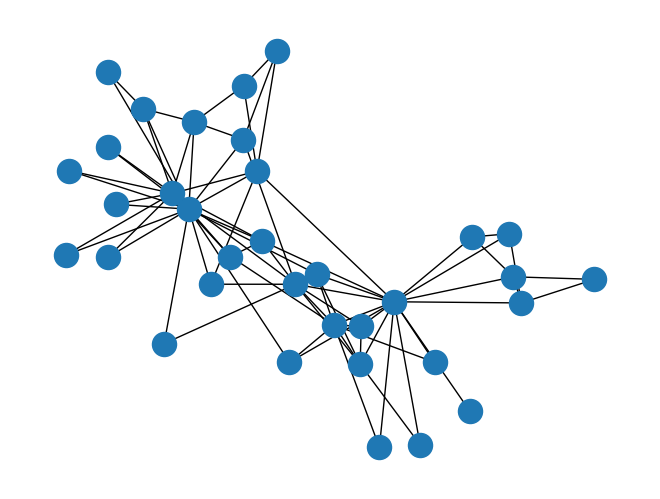

In [36]:
nx.draw(G)

In [37]:
save_data = False

In [38]:
s0 = np.zeros(n)
p_s = 0.2
s0[list(random.sample(range(n), int(p_s * n)))] = 1

alpha = 0
gamma = 1
b = 1

contagion_function = lambda nu, b: 1 - (1 - b) ** nu
c = contagion_function(np.arange(n), b)

x = contagion_process(A, gamma, c, s0, tmin=0, tmax=10, random_seed=None)

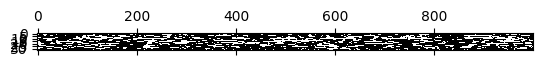

In [15]:
plt.spy(x.T)

In [39]:
import cProfile

In [42]:
p_c = np.ones((2, n))

p_rho = [2, 5]

rho0 = beta(p_rho[0], p_rho[1]).rvs()
print(rho0)

A0 = nx.adjacency_matrix(nx.fast_gnp_random_graph(n, rho0))

cProfile.run(
    "samples, l = infer_adjacency_matrix(x, A0, p_rho, p_c, nsamples=100, burn_in=10000, skip=100, return_likelihood=True)",
    sort="tottime",
)

0.18469511110410902
Acceptance ratio is 0.31909547738693467
         2352643 function calls (2352641 primitive calls) in 1.422 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    39800    0.674    0.000    0.931    0.000 inference.py:140(count_local_infection_events)
   358506    0.192    0.000    0.192    0.000 {built-in method builtins.round}
        1    0.078    0.078    1.421    1.421 inference.py:13(infer_adjacency_matrix)
    39806    0.067    0.000    0.067    0.000 {method 'reduce' of 'numpy.ufunc' objects}
    19901    0.060    0.000    0.299    0.000 inference.py:156(dynamics_log_likelihood)
   696535    0.048    0.000    0.048    0.000 inference.py:159(<genexpr>)
    19901    0.045    0.000    0.094    0.000 {built-in method builtins.sum}
    19901    0.028    0.000    0.028    0.000 inference.py:162(adjacency_log_likelihood)
    79602    0.024    0.000    0.053    0.000 <__array_function__ internals>:177(size)


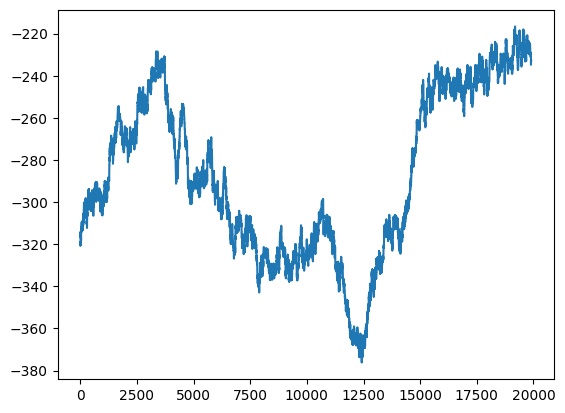

In [43]:
plt.plot(l)

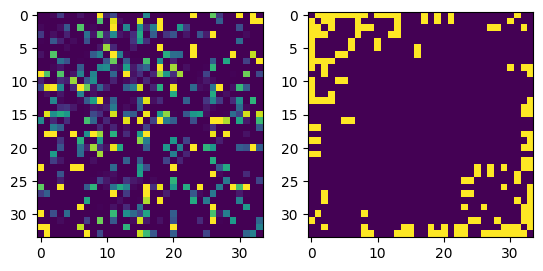

In [28]:
p = np.mean(samples, axis=0)
plt.subplot(121)
plt.imshow(p, cmap="viridis", vmin=0, vmax=1)
plt.subplot(122)
plt.imshow(A.todense(), vmin=0, vmax=1)

In [31]:
samples = 1000

gamma = np.zeros(samples)
c_samples = np.zeros((samples, n))

p_rho = np.array([1, 1])
p_gamma = np.array([1, 1])
p_c = np.ones((2, n))

for i in range(1000):
    g, b = infer_dynamics(x, A, p_gamma, p_c)
    gamma[i] = g
    c_samples[i] = b

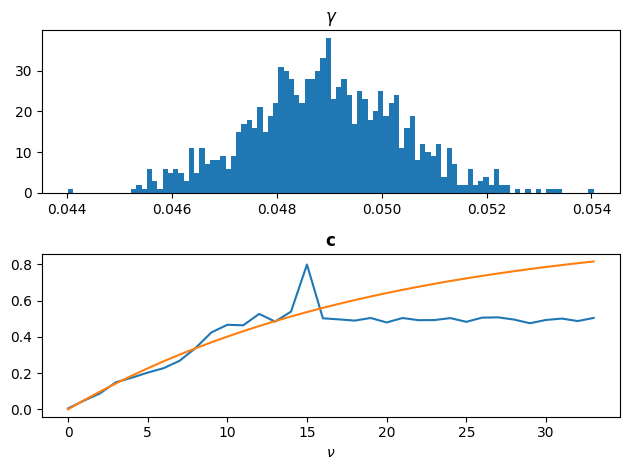

In [32]:
plt.figure()
plt.subplot(211)
plt.title(r"$\gamma$")
plt.hist(gamma, bins=100)

plt.subplot(212)
plt.title(r"$\mathbf{c}$")
plt.plot(np.mean(c_samples, axis=0))
plt.xlabel(r"$\nu$")
plt.plot(c)

plt.tight_layout()
plt.show()